In [45]:
from matplotlib import pyplot as plt
from scipy.optimize import fmin_l_bfgs_b
import numpy as np
import helper
from glob import glob
import os
from keras import backend as K
import tensorflow as tf

In [61]:
from keras.models import load_model
AM = load_model('face_gen.h5')

In [62]:
Gen = AM.get_layer("sequential_1")

## Face 1

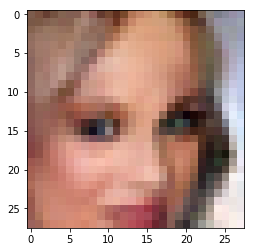

In [66]:
noise = K.random_uniform_variable((1,100), -1, 1)
i = Gen.predict(noise, steps=1)
im = (((i - i.min()) * 255) / (i.max() - i.min())).astype(np.uint8)
plt.imshow(im[0])

## Face 2

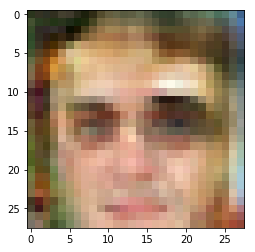

In [64]:
noise2 = K.random_uniform_variable((1,100), -1, 1)
i2 = Gen.predict(noise2, steps=1)
im2 = (((i2 - i2.min()) * 255) / (i2.max() - i2.min())).astype(np.uint8)
plt.imshow(im2[0])

## Face 1 + Face 2

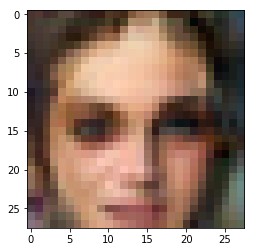

In [67]:
noise3 = (noise + noise2) / 2
i3 = Gen.predict(noise3, steps=1)
im3 = (((i3 - i3.min()) * 255) / (i3.max() - i3.min())).astype(np.uint8)
plt.imshow(im3[0])

## GAN Reverse

In [79]:
def gan_reverse(i, steps = 50):
    z = K.random_uniform_variable((1,100), -1, 1)

    x = K.placeholder()
    loss = K.sum(K.square(i - Gen.outputs[0]))
    grad = K.gradients(loss, Gen.inputs[0])[0]
    update_fn = K.function(Gen.inputs, [grad])

    for step in range(steps):
        j = Gen.predict(z, steps=1)
        for _ in range(5):
            update_vec = update_fn([z, j])[0]
            z -= update_vec * 0.015

        if step % 5 == 0:
            print("Step:", step)
    return z

Step: 0
Step: 5
Step: 10
Step: 15
Step: 20
Step: 25
Step: 30
Step: 35
Step: 40
Step: 45


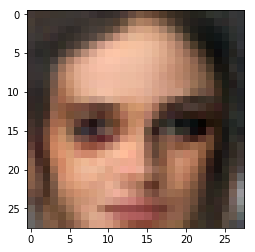

In [81]:
z = gan_reverse(i3)
j = Gen.predict(z, steps=1)
j = (((j - j.min()) * 255) / (j.max() - j.min())).astype(np.uint8)
plt.imshow(j[0])

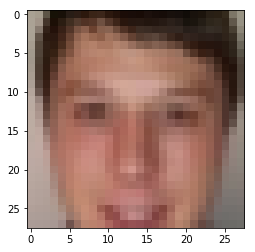

In [69]:
im_dir = glob(os.path.join('.', 'jch.jpeg'))[0]
image1 = helper.get_image(im_dir, 'RGB', helper.preprocessing, width=28, height=28, face_size=80, delta_i=-10, delta_j=0)
plt.imshow(image1)

Step: 0
Step: 5
Step: 10
Step: 15
Step: 20
Step: 25
Step: 30
Step: 35
Step: 40
Step: 45


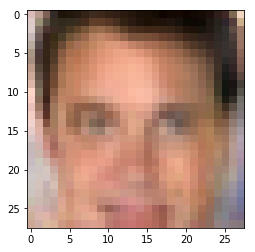

In [70]:
z1 = gan_reverse(image1 / 255 - 0.5)
j1 = Gen.predict(z1, steps=1)
plt.imshow(helper.image_for_plot(j1[0]))

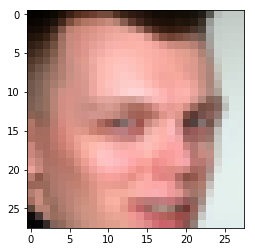

In [51]:
im_dir = glob(os.path.join('.', 'cahir.jpg'))[0]
image2 = helper.get_image(im_dir, 'RGB', helper.preprocessing, width=28, height=28, \
                         face_size=220, delta_i=0, delta_j=-110)
plt.imshow(image)

Step: 0
Step: 5
Step: 10
Step: 15
Step: 20
Step: 25
Step: 30
Step: 35
Step: 40
Step: 45


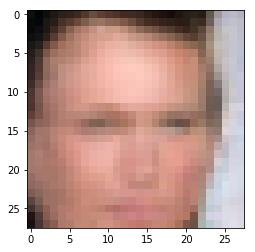

In [72]:
z2 = gan_reverse(image2 / 255 - 0.5)
j2 = Gen.predict(z2, steps=1)
plt.imshow(helper.image_for_plot(j2[0]))

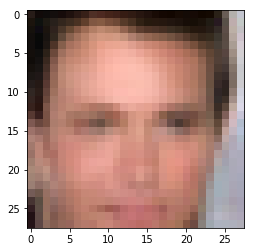

In [80]:
j3 = Gen.predict((z1 + z2) / 2, steps=1)
plt.imshow(helper.image_for_plot(j3[0]))